In [1]:
from top2vec import Top2Vec
import umap
from umap import UMAP
import hdbscan
from hdbscan import HDBSCAN

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-04-19 23:17:58.243520: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 23:18:01.546532: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/alfredourrea/.local/lib/python3.10/site-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 

In [2]:
model = Top2Vec.load("model_EP3")


doc_vecs = model.document_vectors
cluster_labels = model.doc_top # Or any other method to obtain labels if this doesn't directly apply

umap_args = {'n_neighbors': 18,
             'n_components': 10,
             'metric': 'cosine',
             "random_state": 42,
             }

hdbscan_args = {'min_cluster_size': 7,
                'min_samples': 1,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'
               }
# Use UMAP to reduce dimensionality for visualization (adjust parameters as necessary)

doc_vecs = model.document_vectors

umap_3d = umap.UMAP(**umap_args)
proj_3d = umap_3d.fit_transform(doc_vecs)

    
cluster = hdbscan.HDBSCAN(**hdbscan_args).fit(proj_3d)

topic_words = model.get_topics()[0] 

top_3_topic_words = [words[:3] for words in topic_words]
doc_top_3_words = [top_3_topic_words[label] for label in cluster.labels_]

/home/alfredourrea/.local/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [9]:
print(len(cluster.labels_))

724


In [8]:
import pandas as pd
color_cluster_table = pd.DataFrame({
    'Cluster Label': cluster_labels,
    'Color': [cluster.labels_[label] for label in cluster_labels]
})
color_cluster_table

,Cluster Label,Color
0,8,7
1,40,19
2,0,1
3,1,10
4,9,3
...,...,...
719,11,7
720,45,-1
721,18,15
722,18,15


In [3]:
import numpy as np

# Saving UMAP projections
np.savetxt('umap_proj_3d.txt', proj_3d)

# Saving HDBSCAN cluster labels
np.savetxt('hdbscan_cluster_labels.txt', cluster.labels_, fmt='%d')  # Saving as integer format

# Saving top 3 topic words for each document
with open('top_3_topic_words.txt', 'w') as file:
    for words in doc_top_3_words:
        file.write('; '.join(words) + '\n')

In [4]:
keywords = ["mercantil","organización","colectivo","voluntario","acumulacion capital","economia popular","servicio domestico","reproduccion vida", "hogar","remunerado"]

print(keywords[0])
    # Assuming your model has a method to find related topics and generate word clouds
    # For demonstration, let's generate a dummy word cloud based on the keyword
#topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=[keyword], num_topics=40)
#model.hierarchical_topic_reduction(num_topics=3)
model.hierarchical_topic_reduction(num_topics=20)


mercantil


[[20, 32, 0],
 [44, 30, 19, 25, 38, 10],
 [1],
 [37, 13],
 [31, 29, 15],
 [42, 36, 33, 14],
 [28, 45, 2],
 [23, 5],
 [41, 8],
 [17, 34, 9],
 [22, 40, 18],
 [24, 16],
 [43, 4],
 [3],
 [39, 26],
 [6],
 [35, 27],
 [46, 12],
 [11],
 [21, 7]]

In [28]:
import json
import numpy as np

# Assuming topic_words_reduced and topic_word_scores_reduced are lists of lists
# For each reduced topic, save the word-score pairs
for i in range(len(model.topic_words_reduced)):
    words = model.topic_words_reduced[i]
    scores = [float(score) for score in model.topic_word_scores_reduced[i]]  # Convert float32 to float
    word_score_dict = dict(zip(words, scores))

    with open(f'{keyword}_topic_{i}_word_scores.json', 'w') as f:
        json.dump(word_score_dict, f)


In [5]:
import json
import numpy as np

for keyword in keywords:
    topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=[keyword], num_topics=5, reduced = "True")

    for i in topic_nums:
        model.topic_words_reduced[i] = ["reproduccion de la vida" if word == "reproduccion vida" else word for word in model.topic_words_reduced[i]]

    print(len(topic_words))
    #print(word_scores)
    #model.generate_topic_wordcloud(topic_nums[0], reduced = True)
    #for topic in topic_nums:
    #    model.generate_topic_wordcloud(topic, reduced = True)


# Assuming topic_words_reduced and topic_word_scores_reduced are lists of lists
# For each reduced topic, save the word-score pairs
    iter = 1
    for i in topic_nums:
        words = model.topic_words_reduced[i]
        scores = [float(score) for score in model.topic_word_scores_reduced[i]]  # Convert float32 to float
        word_score_dict = dict(zip(words, scores))
        print(keyword, iter, i)
        if i != 19:
            with open(f'{keyword}_topic_{iter}_word_scores.json', 'w') as f:
                json.dump(word_score_dict, f)
        iter += 1


5
mercantil 1 19
mercantil 2 12
mercantil 3 17
mercantil 4 4
mercantil 5 5
5
organización 1 19
organización 2 2
organización 3 18
organización 4 6
organización 5 4
5
colectivo 1 19
colectivo 2 17
colectivo 3 2
colectivo 4 7
colectivo 5 4
5
voluntario 1 19
voluntario 2 2
voluntario 3 17
voluntario 4 3
voluntario 5 6
5
acumulacion capital 1 17
acumulacion capital 2 19
acumulacion capital 3 14
acumulacion capital 4 5
acumulacion capital 5 3
5
economia popular 1 17
economia popular 2 0
economia popular 3 10
economia popular 4 14
economia popular 5 13
5
servicio domestico 1 19
servicio domestico 2 1
servicio domestico 3 17
servicio domestico 4 11
servicio domestico 5 16
5
reproduccion vida 1 9
reproduccion vida 2 5
reproduccion vida 3 17
reproduccion vida 4 7
reproduccion vida 5 19
5
hogar 1 19
hogar 2 17
hogar 3 1
hogar 4 11
hogar 5 9
5
remunerado 1 19
remunerado 2 1
remunerado 3 17
remunerado 4 5
remunerado 5 9


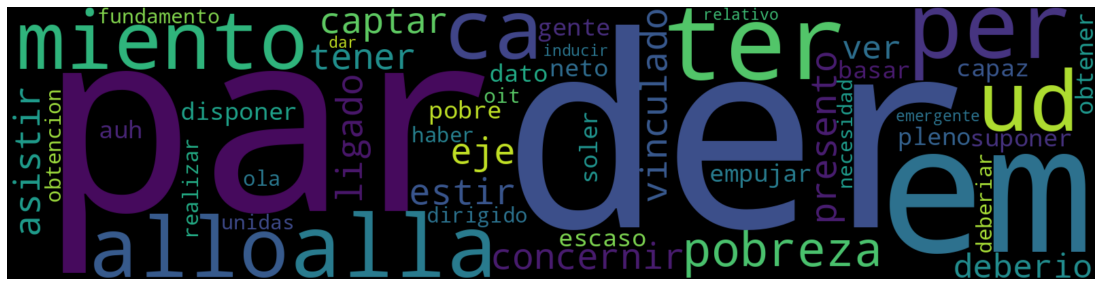

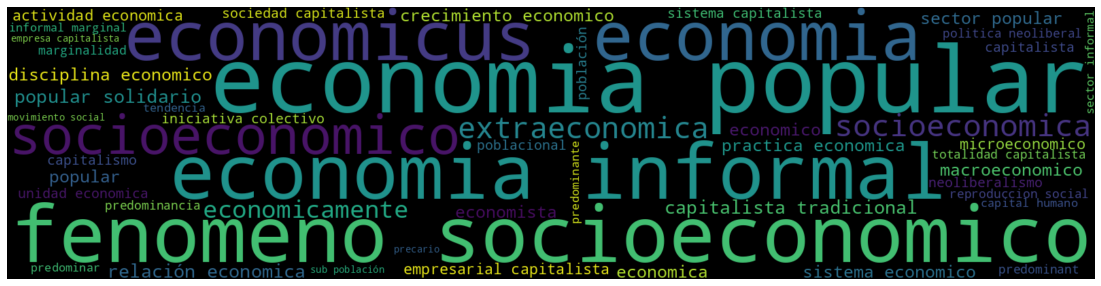

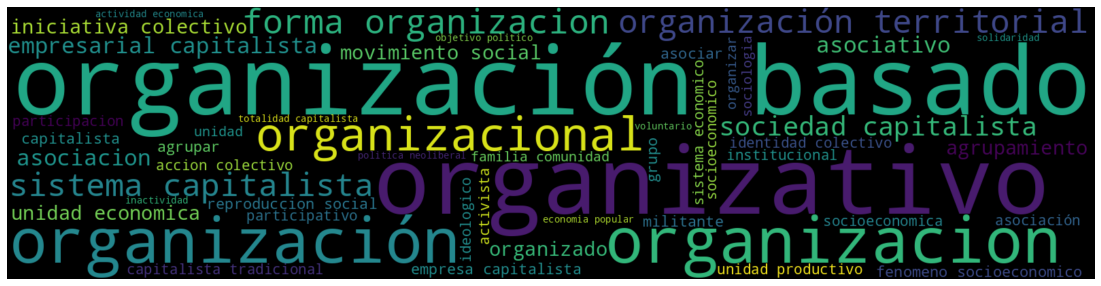

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json

def softmax(x):
    """Compute softmax values for each set of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

# Load and generate WordClouds for each topic
for i in range(3):  # Assuming three topics after reduction
    with open(f'{"colectivo"}_topic_{i+1}_word_scores.json', 'r') as f:
        #print(topic_num[i])
        word_score_dict = json.load(f)
        # Apply softmax to the loaded scores
        words = list(word_score_dict.keys())
        scores = list(word_score_dict.values())
        scores = softmax(scores)
        word_score_dict = dict(zip(words, scores))
        
        wordcloud = WordCloud(width=1600, height=400, background_color="black").generate_from_frequencies(word_score_dict)
        
        # Display the generated WordCloud
        plt.figure(figsize=(20, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
